## DO NOT ALTER THE CODE FROM HERE THROUGH PLOTTING

In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
from scipy import stats

In [92]:
# Importing the cleaned/combined data from the csv with the years 2008-2018

firefile = './output/all_with_no_incident_nulls.csv'
df = pd.read_csv(firefile, skip_blank_lines=True, encoding='UTF-8')
len(df)


/Users/laura/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


159803

In [93]:
df['arrive_date_time'] = pd.to_datetime(df['arrive_date_time'])
df['cleared_date_time'] = pd.to_datetime(df['cleared_date_time'])
df['dispatch_date_time'] = pd.to_datetime(df['dispatch_date_time'])
df.dtypes

OBJECTID                              int64
address                              object
address2                             object
apt_room                             object
arrive_date_time             datetime64[ns]
cleared_date_time            datetime64[ns]
dispatch_date_time           datetime64[ns]
exposure                              int64
incident_number                      object
incident_type                       float64
incident_type_description            object
platoon                              object
station                             float64
Longitude                            object
Latitude                             object
Year                                float64
Date                                 object
dtype: object

In [97]:
df['Year'] = df['Year'].astype(float).map("{:.0f}".format)
df['station'] = df['station'].astype(float).map("{:.0f}".format)

In [98]:
# The total number of rows with the years 2008-2018 and incident type not null
len(df['dispatch_date_time'].unique())

154071

In [99]:
df.groupby('Year')['OBJECTID'].count()

Year
2008    13705
2009    13028
2010    13531
2011    13893
2012    13607
2013    13943
2014    14415
2015    15130
2016    15746
2017    18151
2018    14654
Name: OBJECTID, dtype: int64

In [100]:
# Calculating the time from dispatch to cleared in minutes and in seconds
df['Arr Time'] = (df['arrive_date_time'] - df['dispatch_date_time'])
df['Arr Time'] = pd.to_timedelta(df['Arr Time'])
df['Seconds'] = df['Arr Time'].dt.total_seconds()


In [101]:
df = df.loc[df['station']!=13.0]
len(df)

159803

In [102]:
# Getting rid of the entries that have no station assigned
dfs = df.loc[df['station'].notnull()]
len(dfs)

159803

In [103]:
# dfs = df.loc[df['station']!=29]
# len(dfs)

In [104]:
# Getting rid of entries with no arrive time (FUTURE WOULD LIKE TO KNOW WHAT THESE ARE)
# raw_year = df.groupby(['Year']).OBJECTID.count()
# years = no_outliers.groupby(['Year']).OBJECTID.count()
# diff = raw_year - years
# diff #<-- This represents the number of arrival times that were considered outliers per year

In [105]:
dfst = dfs.loc[dfs['arrive_date_time'].notnull()]
len(dfst)

129762

In [106]:
df_year = dfst.groupby('Year')['OBJECTID'].count()
df_year

Year
2008    11894
2009    10927
2010    11182
2011    11356
2012    10984
2013    11073
2014    11529
2015    12061
2016    12563
2017    14423
2018    11770
Name: OBJECTID, dtype: int64

In [117]:
ymean = round(df_year.mean(),2)
ymed = round(df_year.median(),2)
sdev = round(df_year.std(),2)
serr = round(df_year.sem(),2)
message = f'Raleigh FD had a mean incident rate of {ymean} per year, median {ymed}, with a standard deviation of {sdev} and error {serr}'
print(message)

ymax = df_year.max()
ymin = df_year.min()
message2 = f'The most incidents came in 2017 when there were {ymax}, the minimum in 2009 when there were {ymin}.'
print(message2)


Raleigh FD had a mean incident rate of 11796.55 per year, median 11529.0, with a standard deviation of 1007.42 and error 303.75
The most incidents came in 2017 when there were 14423, the minimum in 2009 when there were 10927.


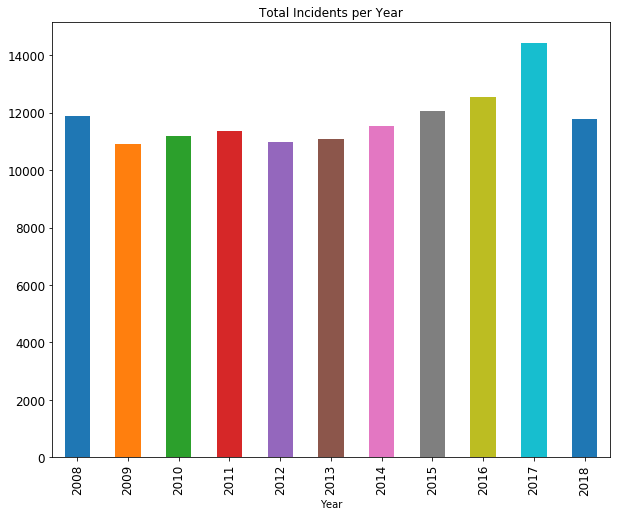

In [118]:
df_year.plot(kind='bar', figsize=(10,8), use_index=True, title='Total Incidents per Year', grid=False,fontsize=12)
plt.savefig('./graphics/total_fi_year_withoutliers.png')

### Fire incidents analysis
- Fire incidents have been on the rise in Raleigh over the period of study
- Raleigh FD had a mean incident rate of 11796.55 per year, median 11529.0, with a standard deviation of 1007.42 and error 303.75
- The most incidents came in 2017 when there were 14423, the minimum in 2009 when there were 10927.

## Station response time

In [57]:
# There appear to be some funky clearance times, possibly human error
outliers = dfst[dfst['Seconds'] > dfst['Seconds'].mean() + 3 * dfst['Seconds'].std()]
no_outliers = dfst[dfst['Seconds'] <= dfst['Seconds'].mean() + 3 * dfst['Seconds'].std()]

In [58]:
len(outliers)

59

In [59]:
len(no_outliers)

129671

In [60]:
no_outliers.dtypes

OBJECTID                               int64
address                               object
address2                              object
apt_room                              object
arrive_date_time              datetime64[ns]
cleared_date_time             datetime64[ns]
dispatch_date_time            datetime64[ns]
exposure                               int64
incident_number                       object
incident_type                        float64
incident_type_description             object
platoon                               object
station                              float64
Longitude                             object
Latitude                              object
Year                                 float64
Date                                  object
Arr Time                     timedelta64[ns]
Seconds                              float64
dtype: object

In [61]:
station_means = no_outliers.groupby('station')['Seconds'].mean()


In [62]:
station_err = no_outliers.groupby('station')['Seconds'].sem()


In [49]:
# sta_year_means = sta_year_mean.unstack()
# sta_year_errs = sta_year_err.unstack()

In [63]:
station_means

station
1.0     232.764706
2.0     329.375452
3.0     247.373600
4.0     294.245433
5.0     262.209180
6.0     303.941050
7.0     259.601442
8.0     324.286386
9.0     258.101934
10.0    278.422216
11.0    299.088707
12.0    288.164766
14.0    278.062243
15.0    297.654177
16.0    308.130351
17.0    283.361592
18.0    303.521548
19.0    290.822857
20.0    310.895833
21.0    328.125689
22.0    333.490593
23.0    341.339914
24.0    314.725104
25.0    328.306218
26.0    325.808698
27.0    348.363532
28.0    326.020979
29.0    311.735941
Name: Seconds, dtype: float64

In [64]:
station_err

station
1.0     1.164787
2.0     3.103682
3.0     1.536824
4.0     2.330528
5.0     1.796095
6.0     1.971223
7.0     1.863377
8.0     2.076039
9.0     1.929475
10.0    2.197111
11.0    1.522089
12.0    1.446534
14.0    2.105058
15.0    1.778053
16.0    1.927575
17.0    2.095235
18.0    2.170273
19.0    1.614977
20.0    1.942249
21.0    2.435231
22.0    2.181790
23.0    3.038451
24.0    2.390538
25.0    3.172312
26.0    2.607717
27.0    5.949531
28.0    3.758873
29.0    6.505150
Name: Seconds, dtype: float64

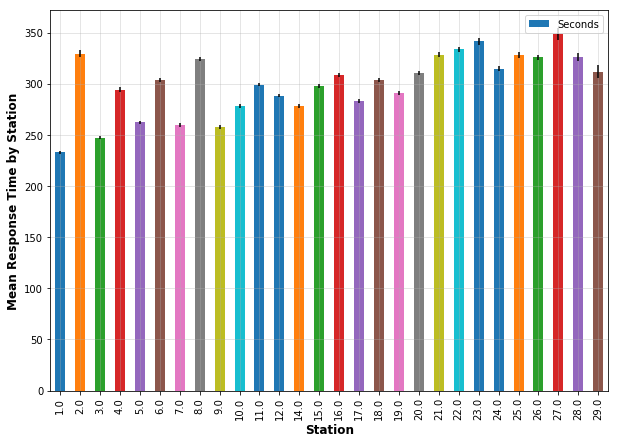

In [70]:
chart = station_means.plot(yerr=station_err, kind='bar', figsize=(10,7))
fig.set_size_inches(10, 8)
fig.ylimit=(0,400)
fig.xlimit=(0,30)

plt.grid(alpha=0.4)
plt.xlabel('Station', fontsize=12, fontweight='bold')
plt.ylabel('Mean Response Time by Station', fontsize=12, fontweight='bold')

plt.legend(loc='best')
plt.title('', fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.savefig('./graphics/Fig2.png')